Ans-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [ ]:
df1 = pd.read_csv("links.csv")
df2 = pd.read_csv("movies.csv")
df3 = pd.read_csv("ratings.csv")
df4 = pd.read_csv("tags.csv")

In [ ]:
#Finding null values in links csv file
print('Number of null values in links files:\n',df1.isna().sum(),sep="")
df1.loc[df1.tmdbId.isna()]

Number of null values in links files:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [ ]:
#Finding null values in movies, ratings and tags csv file respectively
print('For movies csv file:\n',df2.isna().sum())
print('For rating csv file:\n',df3.isna().sum())
print('For tags csv file:\n',df4.isna().sum())

For movies csv file:
 movieId    0
title      0
genres     0
dtype: int64
For rating csv file:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
For tags csv file:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
#Finding frequent values in categorical attributes
df2.title.value_counts().sort_values(ascending=False)
df2.genres.value_counts().sort_values(ascending=False)
df4.tag.value_counts().sort_values(ascending=False)

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
Disney                23
                    ... 
stephen king           1
good and evil          1
entirely dialogue      1
David Thewlis          1
Insane                 1
Name: tag, Length: 1589, dtype: int64

In [ ]:
df3['userId'].nunique()

610

In [ ]:
merge_MR = pd.merge(df2,df3,on='movieId',how= 'outer')

In [ ]:
merge_MR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143042 entries, 0 to 143041
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    143042 non-null  int64  
 1   title      143041 non-null  object 
 2   genres     143041 non-null  object 
 3   userId     143023 non-null  float64
 4   rating     143022 non-null  float64
 5   timestamp  143022 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 7.6+ MB


In [ ]:
test_df = merge_MR.drop('timestamp',axis = 1)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143042 entries, 0 to 143041
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  143042 non-null  int64  
 1   title    143041 non-null  object 
 2   genres   143041 non-null  object 
 3   userId   143023 non-null  float64
 4   rating   143022 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.5+ MB


In [ ]:
test_df.isnull().sum()

movieId     0
title       1
genres      1
userId     19
rating     20
dtype: int64

In [ ]:
test_df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5


In [ ]:
test = test_df.dropna(how='any',axis=0)

In [ ]:
test.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143022 entries, 0 to 143040
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  143022 non-null  int64  
 1   title    143022 non-null  object 
 2   genres   143022 non-null  object 
 3   userId   143022 non-null  float64
 4   rating   143022 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.5+ MB


In [ ]:
test1 = test.drop_duplicates(['userId','title'])

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100832 entries, 0 to 143039
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100832 non-null  int64  
 1   title    100832 non-null  object 
 2   genres   100832 non-null  object 
 3   userId   100832 non-null  float64
 4   rating   100832 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.6+ MB


In [39]:
final_df = test1.pivot(index='userId', columns='title', values='rating').fillna(0)

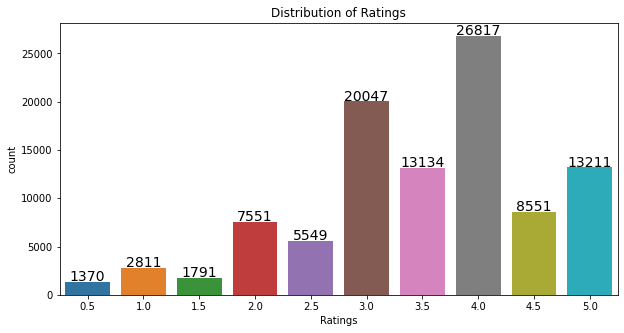

In [35]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=test1, x='rating')
labels = (test1['rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

          movieId    userId    rating
movieId  1.000000  0.006852 -0.004066
userId   0.006852  1.000000 -0.049358
rating  -0.004066 -0.049358  1.000000


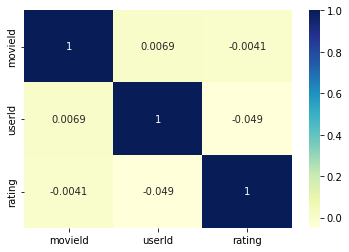

In [38]:
correlations = test1.corr()
print(correlations)
sns.heatmap(correlations,annot=True,cmap="YlGnBu")
plt.show()

Ans - 2

In [40]:
final_df = final_df.astype('int64')

In [41]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

final_df = final_df.applymap(encode_ratings)

In [42]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(final_df, min_support=0.1, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

In [44]:
df_rules = rules.sort_values(by=['lift'], ascending=False)
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1907651,"(Kill Bill: Vol. 1 (2003), Fight Club (1999), ...","(Kill Bill: Vol. 2 (2004), Matrix, The (1999),...",0.106557,0.111475,0.100000,0.938462,8.418552,0.088121,14.438525
1907662,"(Kill Bill: Vol. 2 (2004), Matrix, The (1999),...","(Kill Bill: Vol. 1 (2003), Fight Club (1999), ...",0.111475,0.106557,0.100000,0.897059,8.418552,0.088121,8.679157
1907681,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...","(Matrix, The (1999), Kill Bill: Vol. 1 (2003),...",0.114754,0.106557,0.100000,0.871429,8.178022,0.087772,6.948998
1051321,"(Kill Bill: Vol. 1 (2003), Fight Club (1999), ...","(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...",0.106557,0.114754,0.100000,0.938462,8.178022,0.087772,14.385246
1051340,"(Kill Bill: Vol. 2 (2004), Star Wars: Episode ...","(Kill Bill: Vol. 1 (2003), Fight Club (1999), ...",0.114754,0.106557,0.100000,0.871429,8.178022,0.087772,6.948998
...,...,...,...,...,...,...,...,...,...
38258,"(Matrix, The (1999))","(Batman (1989), Pulp Fiction (1994))",0.447541,0.245902,0.111475,0.249084,1.012943,0.001424,1.004238
2191,(Beauty and the Beast (1991)),"(Matrix, The (1999))",0.239344,0.447541,0.108197,0.452055,1.010086,0.001080,1.008238
2190,"(Matrix, The (1999))",(Beauty and the Beast (1991)),0.447541,0.239344,0.108197,0.241758,1.010086,0.001080,1.003184
4467,"(Fugitive, The (1993))",(Fight Club (1999)),0.309836,0.352459,0.109836,0.354497,1.005783,0.000632,1.003158


In [49]:
#df_MIB = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Forrest Gump (1994)')]
movies_watched =  ['Matrix, The (1999)']
df_movies = df_rules[df_rules['antecedents'].apply(lambda x: set(movies_watched) == set(x))]

In [50]:
df_movies = df_movies[df_movies['lift'] > 2]

In [51]:
df_movies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
369038,"(Matrix, The (1999))","(Kill Bill: Vol. 1 (2003), Fight Club (1999), ...",0.447541,0.116393,0.116393,0.260073,2.234432,0.064303,1.194181
1829128,"(Matrix, The (1999))","(Kill Bill: Vol. 1 (2003), Forrest Gump (1994)...",0.447541,0.100000,0.100000,0.223443,2.234432,0.055246,1.158962
2339886,"(Matrix, The (1999))","(Star Wars: Episode IV - A New Hope (1977), St...",0.447541,0.103279,0.103279,0.230769,2.234432,0.057057,1.165738
999112,"(Matrix, The (1999))","(Star Wars: Episode IV - A New Hope (1977), Ki...",0.447541,0.111475,0.111475,0.249084,2.234432,0.061586,1.183255
579430,"(Matrix, The (1999))","(Seven (a.k.a. Se7en) (1995), Memento (2000), ...",0.447541,0.114754,0.114754,0.256410,2.234432,0.063397,1.190503
...,...,...,...,...,...,...,...,...,...
116924,"(Matrix, The (1999))",(Raiders of the Lost Ark (Indiana Jones and th...,0.447541,0.140984,0.126230,0.282051,2.000596,0.063134,1.196487
225048,"(Matrix, The (1999))","(Terminator 2: Judgment Day (1991), Forrest Gu...",0.447541,0.140984,0.126230,0.282051,2.000596,0.063134,1.196487
118046,"(Matrix, The (1999))","(Speed (1994), Star Wars: Episode V - The Empi...",0.447541,0.140984,0.126230,0.282051,2.000596,0.063134,1.196487
1494802,"(Matrix, The (1999))","(Star Wars: Episode IV - A New Hope (1977), Sh...",0.447541,0.172131,0.154098,0.344322,2.000349,0.077063,1.262616


In [52]:
movies = df_movies['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

In [53]:
movie_list[0:4]

['Kill Bill: Vol. 1 (2003)',
 'Fight Club (1999)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Forrest Gump (1994)']

Ans - 3

In [ ]:
su = frequent_itemset.support.unique()

In [46]:
fredic = {}
for i in range(len(su)):
    inset = list(frequent_itemset.loc[frequent_itemset.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent_itemset.loc[frequent_itemset.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

In [47]:
ml = []
for index, row in frequent_itemset.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic2[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        ml.append(row['itemsets'])

In [48]:
ml

[frozenset({'40-Year-Old Virgin, The (2005)'}),
 frozenset({'Amadeus (1984)'}),
 frozenset({'American President, The (1995)'}),
 frozenset({'Animal House (1978)'}),
 frozenset({'Austin Powers in Goldmember (2002)'}),
 frozenset({'Avengers, The (2012)'}),
 frozenset({'Big Fish (2003)'}),
 frozenset({'Blair Witch Project, The (1999)'}),
 frozenset({'Blazing Saddles (1974)'}),
 frozenset({'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)'}),
 frozenset({"Bridget Jones's Diary (2001)"}),
 frozenset({'Butch Cassidy and the Sundance Kid (1969)'}),
 frozenset({"Charlie's Angels (2000)"}),
 frozenset({'Chicken Run (2000)'}),
 frozenset({'Children of Men (2006)'}),
 frozenset({'Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)'}),
 frozenset({'Citizen Kane (1941)'}),
 frozenset({'Crow, The (1994)'}),
 frozenset({'Dead Man Walking (1995)'}),
 frozenset({'Desperado (1995)'}),
 frozenset({'District 9 (2009)'}),
 frozenset({'Django Unch